# Boston housing

## During this project we process data on housing values in Boston in the 1970-1980s. We need to create a linear model, firstly applying predictor standardization.  The model does not need to take into account the interactions of predictors. Then we need to make a diagnostics of the model by 4 steps. The last we need to do is the plot of cost predictions from a variable that has the largest coefficient in absolute value.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

from scipy.stats import ttest_ind, mannwhitneyu

In [102]:
np.random.seed(0)

In [20]:
sns.set_theme(context='notebook', 
                  style='darkgrid', 
                  palette='deep', 
                  font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_palette("pastel")

In [21]:
boston_data = pd.read_csv("../RawData/BostonHousing.csv")

In [22]:
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


We have 14 variables with 506 obervations of each. In this project we are interested in how does the variable <span style="color:red">medv</span> (value, 1000\$) depends on other variables. The headers mean:  

1. <span style="color:red">crim</span> - per capita crime rate by tow;  
2. <span style="color:red">zn</span> - proportion of residential land zoned for lots over 25,000 sq.ft.;  
3. <span style="color:yellow">indus</span> - proportion of non-retail business acres per town;  
4. <span style="color:red">chas</span> - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise);  
5. <span style="color:red">nox</span> - nitrogen oxides concentration (parts per 10 million);  
6. <span style="color:red">rm</span> - average number of rooms per dwelling;  
7. <span style="color:red">age</span> - proportion of owner-occupied units built prior to 1940;  
8. <span style="color:red">dis</span> - weighted mean of distances to five Boston employment centres;  
9. <span style="color:red">rad</span> - index of accessibility to radial highways;  
10. <span style="color:red">tax</span> - full-value property-tax rate per 10,000 dollars;  
11. <span style="color:red">ptratio</span> - pupil-teacher ratio by town;  
12. <span style="color:black">b</span> - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town;  
13. <span style="color:red">lstat</span> - lower status of the population (percent).  

This information was taken from [this website](<https://www.kaggle.com/competitions/boston-housing/overview>).

In [23]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


As we can see there is no NA, Null or NaN values. Furtheremore, all observations of all variables do not contain str type of data. From previous step we also know that <span style="color:red">chas</span> variable can be only 0 or 1, so in further investigation we can use at as factor.

In [24]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Now I would like to check

In [25]:
near_river = boston_data["medv"][boston_data["chas"] == 1]
far_from_river = boston_data["medv"][boston_data["chas"] == 0]

In [26]:
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"] = 14

<AxesSubplot:xlabel='medv', ylabel='Density'>

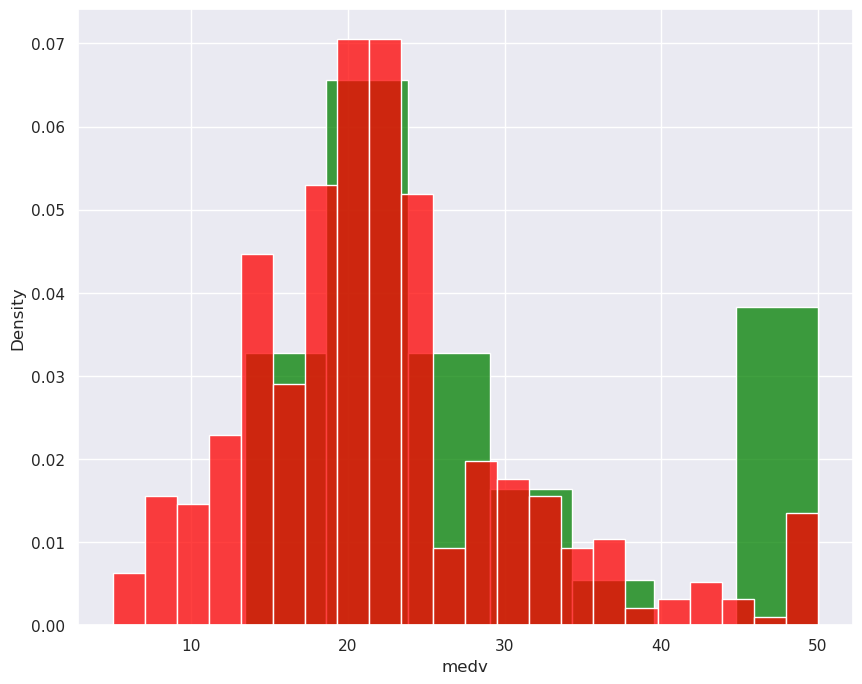

In [27]:
sns.histplot(near_river, stat="density", color="green")
sns.histplot(far_from_river, stat="density", color="red")

As we can see, there is something extraordinary behavior in distribution, so in further investigation it will more respectful to use non parametric tests, because in case of parametric tests we won't control probality of type 1 error. At least we see that there are more expensive houses

## Linear model conctruction.

### Predictor standartization and model construction stage.

Our values have different scales and units, so to get more correct coefficients before predictors we need to standardize observations of variables. But first I would like to split my data frame into 2 data frames: 1st will be a target value - <span style="color:red">medv</span>; 2nd will be the features - other variables.

In [28]:
target = boston_data["medv"]
features = boston_data.loc[:,'crim':'lstat']

In [74]:
mean = target.mean(axis=0)
std = target.std(axis=0)

scaled_target = (target - mean) / std

In [75]:
means = features.mean(axis = 0)
stds = features.std(axis = 0)

scaled_features = (features - means) / stds

scaled_features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [76]:
X = sm.add_constant(scaled_features)
model = sm.OLS(target, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        00:00:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

We need to pay attention, that R-squared is quite big (0.741), what can tell us that this model have some possibilities to predict values. Furthermore, p-value of the model doesn't significantly differ from zero (6.72e-135). Basic model coefficients are shown below.

<AxesSubplot:>

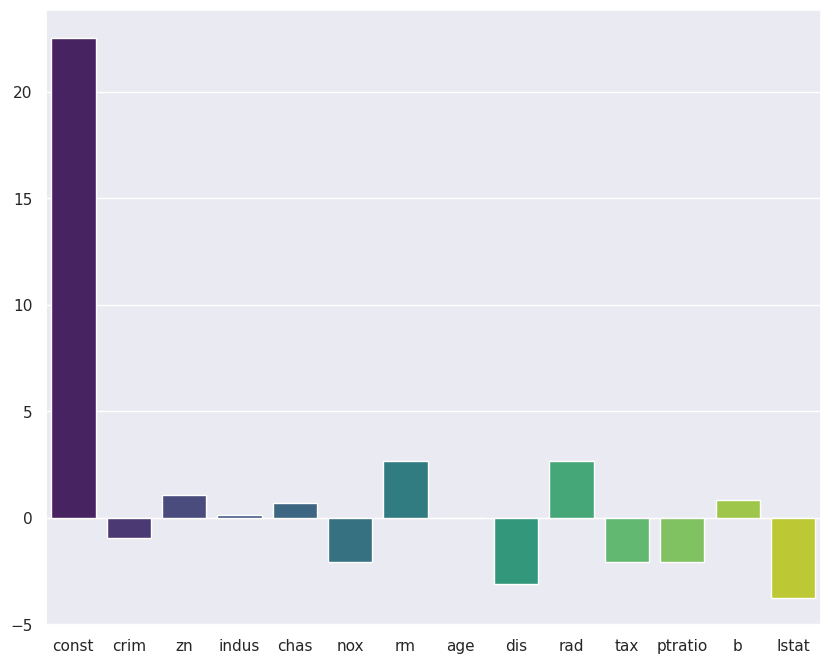

In [77]:
sns.barplot(x=result.params.index, y = result.params, palette="viridis")


I do not find it useful to make a prediction graph before the giagnostics have been done, because data procesiing will be a good practice as we don't know anything about variables. 

## Diagnostics of the model

### Linear independence 

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def VIF_counter(X):
    vif_table = pd.DataFrame()
    vif_table["feature"] = X.columns
    vif_table["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(len(X.columns))]
    
    return vif_table

VIF_counter(X)

,feature,VIF
0,const,1.000000
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


We can see that <span style="color:red">tax</span> variable has very high VIF, what means that the  <span style="color:red">tax</span> variable is highly collinear with other variables in the model. Let's remove it.

In [80]:
model_without_tax = sm.OLS(target, X.drop(columns=["tax"]))
results_without_tax = model_without_tax.fit()

print(results_without_tax.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          1.21e-133
Time:                        00:00:10   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.213    105.772      0.0

R-squared has slightly decreased, but it still significantly different from zero. Let's recalculate VIF. 

In [81]:
VIF_counter(X.drop(columns="tax"))

,feature,VIF
0,const,1.000000
1,crim,1.791940
2,zn,2.184240
3,indus,3.226015
4,chas,1.058220
5,nox,4.369271
6,rm,1.923075
7,age,3.098044
8,dis,3.954446
9,rad,2.837494


All other variables have reasonable value of VIF, so we don't need ro exclude them from further investigation.

### Influential observations

In [82]:
influence = results_without_tax.get_influence()
dims_cook = influence.cooks_distance

dims_cook

(array([2.22595038e-03, 3.82806569e-04, 7.34179288e-04, 1.32085092e-03,
        3.91354583e-03, 6.78454643e-04, 3.37197772e-08, 6.28486363e-03,
        5.12429377e-03, 7.29632664e-07, 1.96849714e-03, 5.53206706e-04,
        4.25590343e-05, 3.82828344e-05, 5.24467702e-05, 2.06980255e-05,
        5.24348865e-04, 1.66094130e-05, 1.39361652e-03, 8.28337105e-07,
        8.72822859e-05, 1.80997229e-04, 1.96645482e-05, 3.78728129e-05,
        2.31308909e-09, 2.18422654e-05, 7.95359259e-05, 1.46644419e-06,
        7.40939068e-05, 7.86351447e-07, 1.18645454e-04, 7.55186635e-04,
        2.46944749e-03, 6.47344009e-05, 1.43051797e-06, 7.02240124e-04,
        1.37279869e-04, 1.33851428e-04, 2.11795553e-04, 6.54246879e-09,
        1.64187398e-04, 1.03755189e-04, 2.13005933e-05, 2.02355120e-05,
        5.51473559e-05, 2.22674038e-04, 1.00882417e-07, 6.26967190e-05,
        6.25353356e-03, 3.86132774e-04, 3.79522776e-05, 3.85293473e-04,
        1.80764926e-04, 2.51372537e-07, 3.82270325e-04, 3.154290

In [83]:
(dims_cook[1]<0.05).sum()

0

There is no influential obervations which could decrease the quality of our model, it seems. I would like to see all distances graph. 

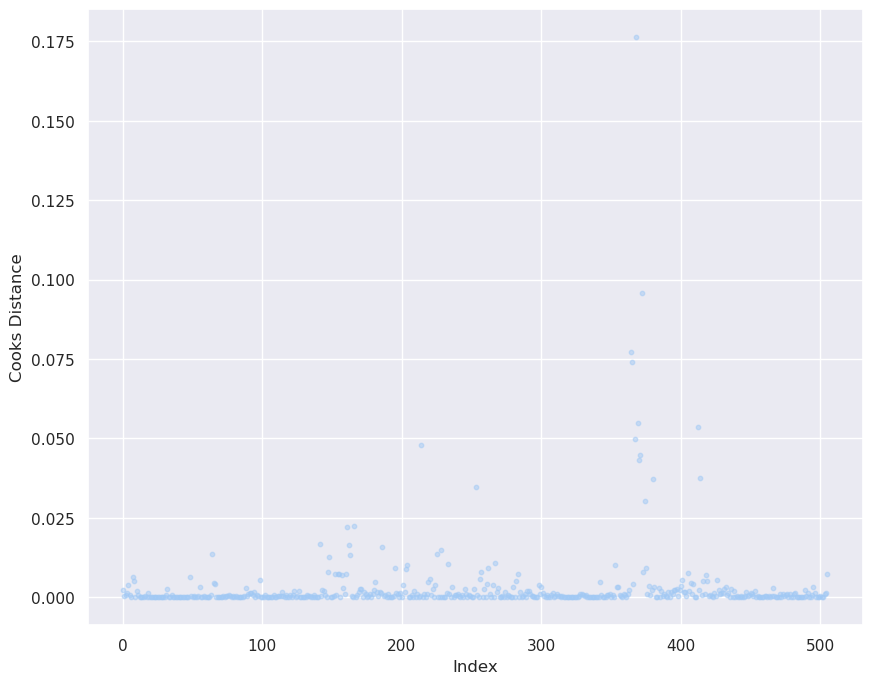

In [84]:
plt.scatter(scaled_features.index, dims_cook[0], s=10, alpha=0.5)
plt.xlabel("Index")
plt.ylabel('Cooks Distance')
plt.autoscale()

### Independence of observations

We don't have enough information to conclude, is there any dependence between our observations. We can make a corr. test, but it won't show us dependence. 

### Errors normal distribution

In [85]:
predicts = results_without_tax.get_prediction(X.drop(columns=["tax"])).predicted_mean
errors = target - predicts

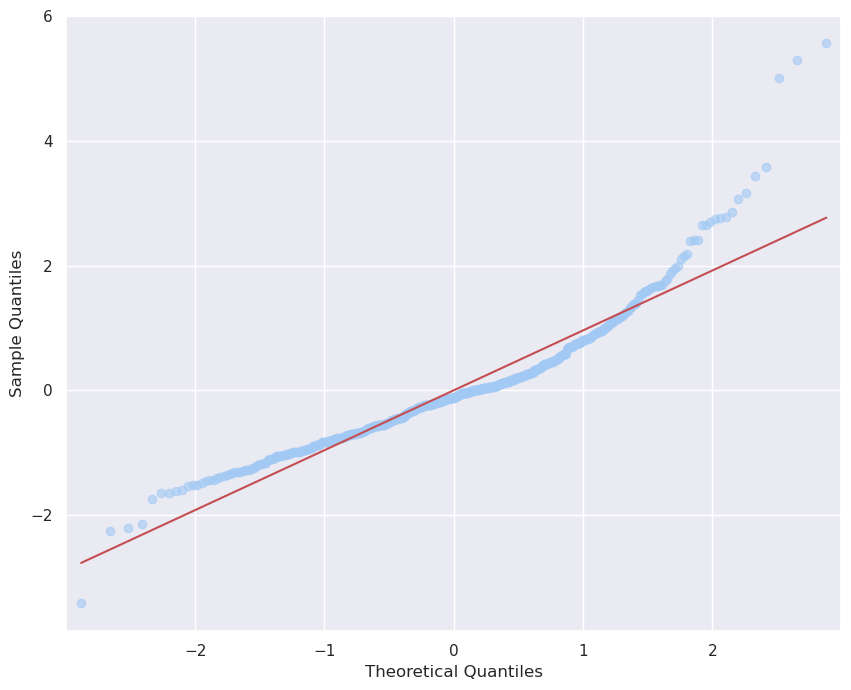

In [86]:
fig = sm.qqplot(errors, line = 'r', fit = True, alpha = 0.6)
plt.show()

<AxesSubplot:xlabel='medv', ylabel='Density'>

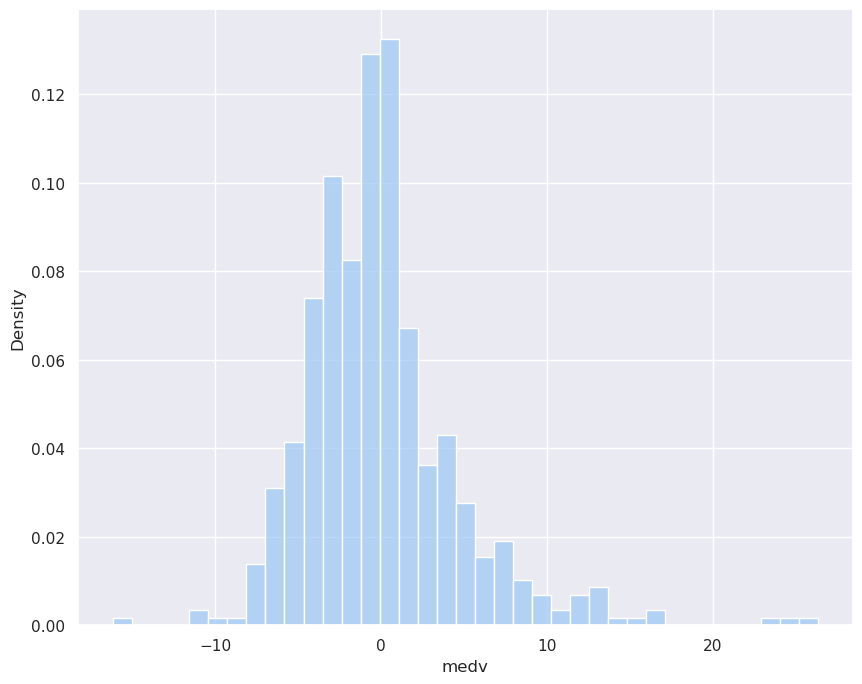

In [87]:
sns.histplot(errors, stat = "density", palette="crest")

We have some hyperpredicted values and underpredicted values, and the distribution doesn't seem normal, at list it is bimodal. I would like to exclude  <span style="color:red">nox</span>  variable from model, because it had the biggest VIF.

In [88]:
model_without_tn = sm.OLS(target, X.drop(columns=["tax", "nox"]))
results_without_tn = model_without_tn.fit()

print(results_without_tn.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          1.03e-129
Time:                        00:00:10   Log-Likelihood:                -1516.1
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     494   BIC:                             3107.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.218    103.429      0.0

R-squared still significantly different from zero.

In [89]:
VIF_counter(X.drop(columns=["tax", "nox"]))

,feature,VIF
0,const,1.000000
1,crim,1.785343
2,zn,2.183394
3,indus,2.872809
4,chas,1.057571
5,rm,1.904013
6,age,2.875130
7,dis,3.641492
8,rad,2.533616
9,ptratio,1.598944


In [90]:
predicts_tn = results_without_tn.get_prediction(X.drop(columns=["tax", "nox"])).predicted_mean
errors_tn = target - predicts_tn

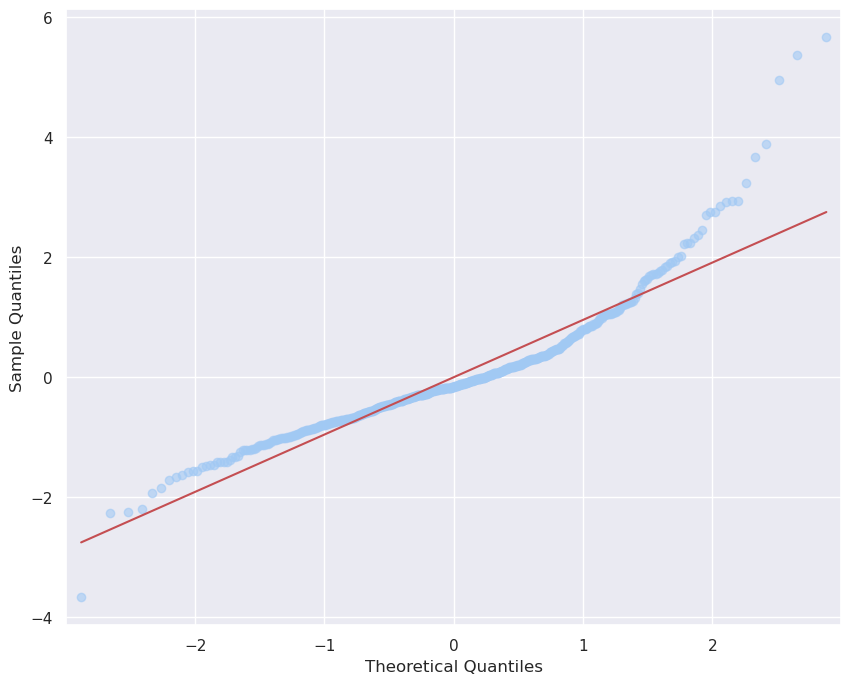

In [91]:
fig1 = sm.qqplot(errors_tn, line='r', fit=True, alpha=0.6)
plt.show()

<AxesSubplot:xlabel='medv', ylabel='Density'>

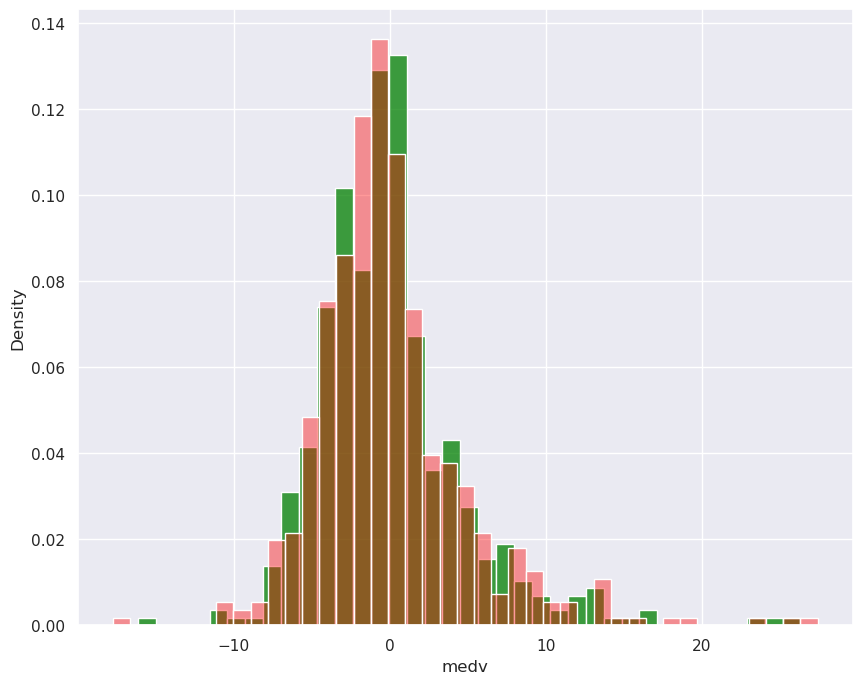

In [106]:
sns.histplot(errors, color="green", stat="density")
sns.histplot(errors_tn, color="red", alpha=0.4, stat="density")


After <span style="color:red">nox</span> variable was removed, residuals destribution became more close to normal distribution, but there are still some superfluous obervations in errors. I would like to test model without <span style="color:red">tax</span> and <span style="color:red">nox</span> variables by `stats.normaltest()`.

In [93]:
def normal_test(residuals, alpha = 0.05):
    k, p = stats.normaltest(residuals)
    if p < alpha:
        print(f"p-value = {p} < {alpha}, H0 should be rejected")
    else:
        print(f"p-value = {p} > {alpha}, H0 can't be rejected")

In [94]:
normal_test(errors_tn)

p-value = 1.6405026604080352e-39 < 0.05, H0 should be rejected


Even residuals of model with removed  <span style="color:red">tax</span> and <span style="color:red">nox</span> variables are not distributed normally. That means that out model does not work well, but I don't know what to do in this situation. 

### Prediction plot.

In [95]:
print(results_without_tn.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          1.03e-129
Time:                        00:00:11   Log-Likelihood:                -1516.1
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     494   BIC:                             3107.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.218    103.429      0.0

In [96]:
print(results_without_tn.params)

const      22.532806
crim       -0.833875
zn          0.878421
indus      -1.081123
chas        0.743002
rm          2.891554
age        -0.506521
dis        -2.553964
rad         0.600287
ptratio    -1.680975
b           0.964326
lstat      -3.849708
dtype: float64


The biggest coefficient, except const, has variable  <span style="color:red">lstat</span>, so it has the most powerful predicting effect on our model, so the graph of prediction should be based on it.

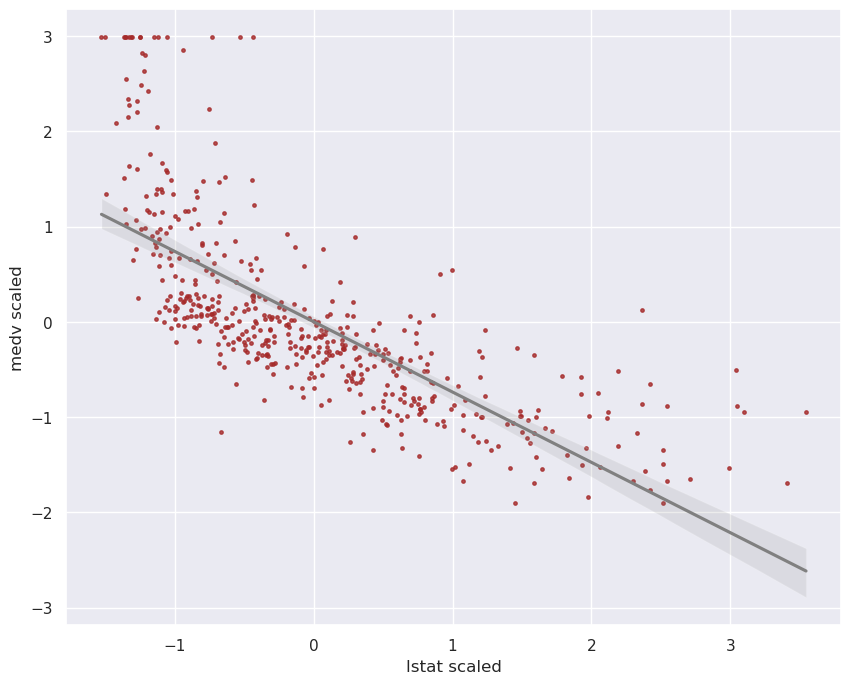

In [99]:
sc_kws = {'color': 'brown', 's': 6}
sns.regplot(x=scaled_features['lstat'], y=scaled_target, scatter_kws=sc_kws, line_kws={'color': 'grey'},
           order=1)
plt.xlabel("lstat scaled")
plt.ylabel("medv scaled")
plt.autoscale()

But as it could be seen, correlation is not so good, beacuse there are a lot of values above the regline when lstat is less than -1, but then between -1 and 1 values of lstat the most part of values are below of the regline.

## Results

In [111]:
print(results_without_tn.params.sort_values())

lstat      -3.849708
dis        -2.553964
ptratio    -1.680975
indus      -1.081123
crim       -0.833875
age        -0.506521
rad         0.600287
chas        0.743002
zn          0.878421
b           0.964326
rm          2.891554
const      22.532806
dtype: float64


I guess that the model doesn't have a good prediction, beacuse there is a strong correlation between features. As it could be seen, the most important for solder value are <span style="color:red">rm</span> and <span style="color:red">b</span>. Also the solder should avoid lower status population (proportion of adults without, some high school education and proportion of male workers classified as laborers), as the <span style="color:red">lstat</span> variable have the lowest coefficient. Furthermore, as the <span style="color:red">dis</span> variable has also sufficient coefficient, the house should't be located too far from employment centres. So the best house is:  

1. Somewhere, where live people with higher education and prosperity;  
2. It might be near one of the employment centres; 
3. There might more rooms in house.  
4. Less black people.

<AxesSubplot:>

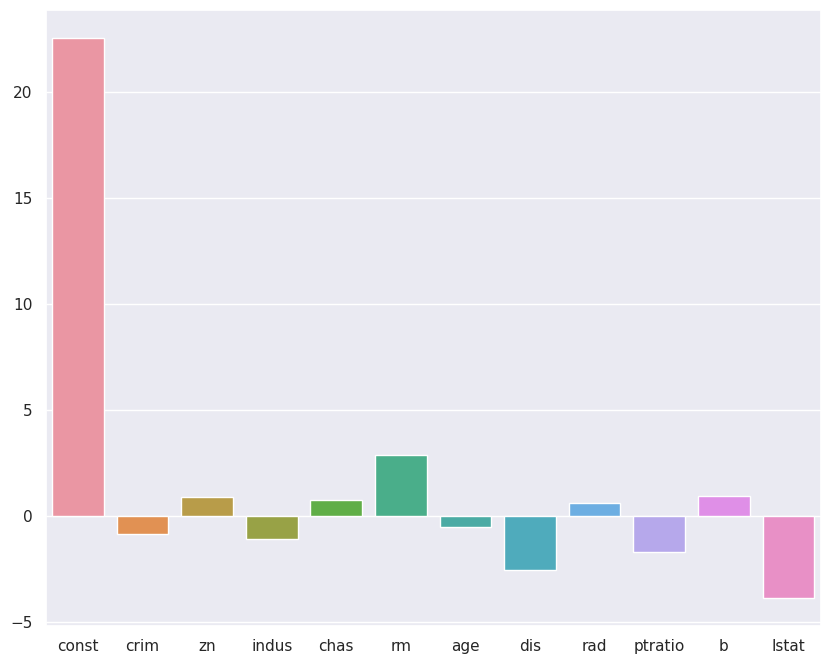

In [119]:
sns.barplot(x=results_without_tn.params.index, y=results_without_tn.params)